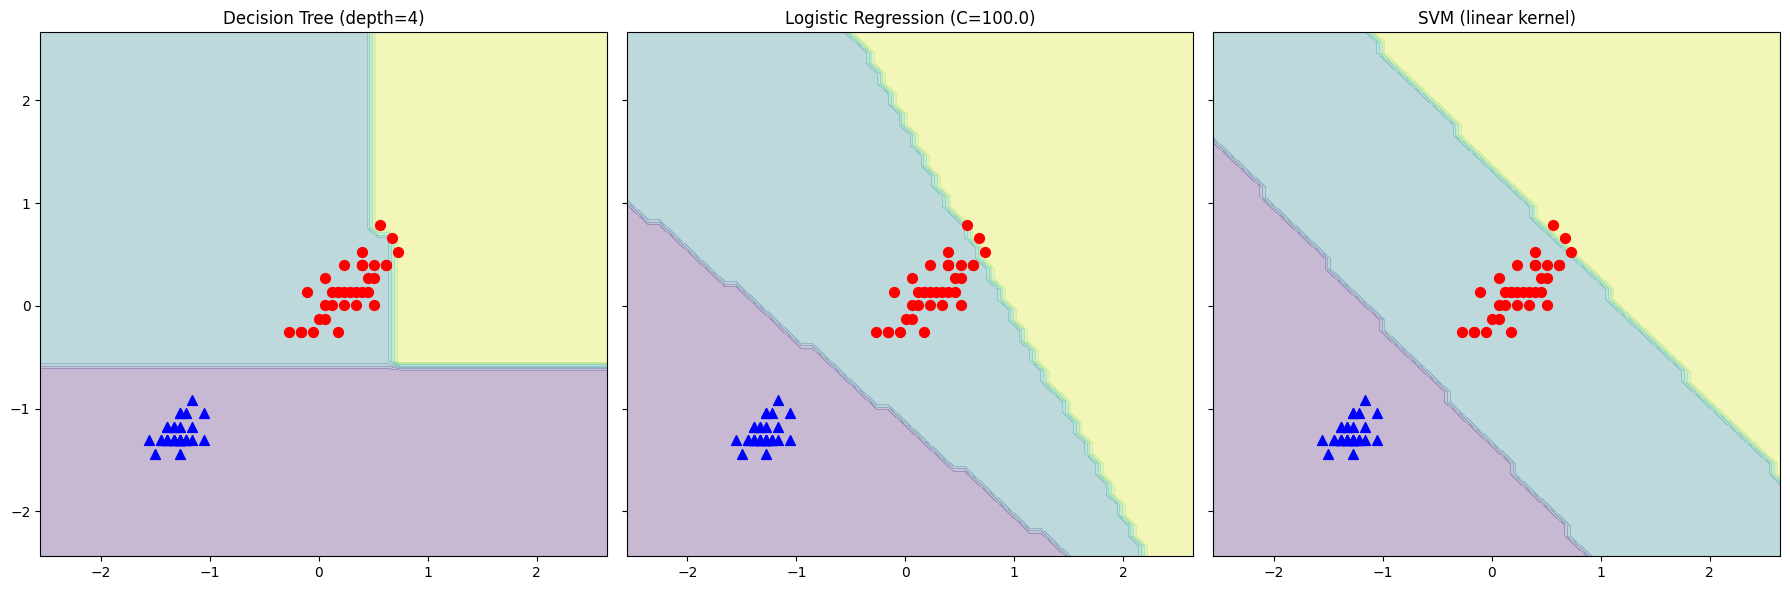

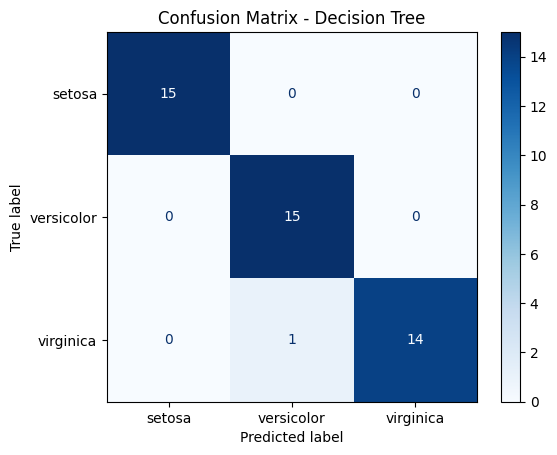

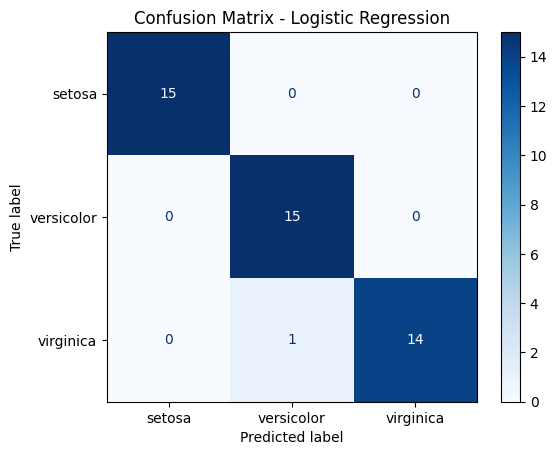

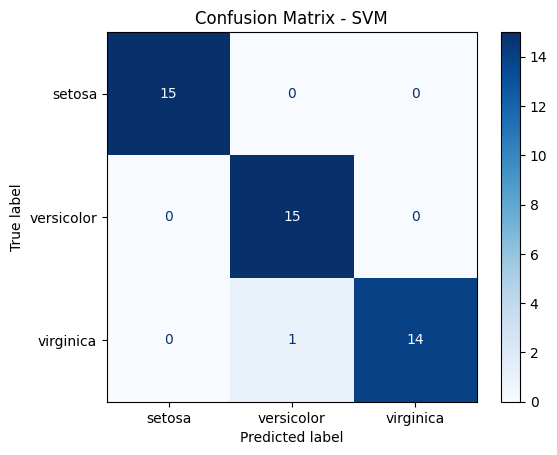

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # we only take two features for visualization
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Decision Tree
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train_std, y_train)

# Logistic Regression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

# SVM
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

# Plotting decision regions
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=3, sharex='col', sharey='row', figsize=(18, 6))

for idx, clf, tt in zip([0, 1, 2],
                        [tree, lr, svm],
                        ['Decision Tree (depth=4)', 'Logistic Regression (C=100.0)', 'SVM (linear kernel)']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train_std[y_train == 0, 0],
                       X_train_std[y_train == 0, 1],
                       c='blue', marker='^',
                       s=50)
    axarr[idx].scatter(X_train_std[y_train == 1, 0],
                       X_train_std[y_train == 1, 1],
                       c='red', marker='o',
                       s=50)
    axarr[idx].set_title(tt)

plt.tight_layout()
plt.show()

# Display confusion matrix
for clf, tt in zip([tree, lr, svm], ['Decision Tree', 'Logistic Regression', 'SVM']):
    y_pred = clf.predict(X_test_std)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {tt}')

plt.show()
